In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns
import scipy as sp
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D, Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from scipy.misc import derivative
import scipy.integrate as intg
import scipy as sp
from astroNN.nn.layers import MCDropout
import math
# np.random.seed(0)

### In this notebook, we use a compressed version of JLA compilation
#### First, we load the trained AutoEncoder

In [2]:
np.random.seed(0)

In [9]:
file2 = '../data/jla_binned_distances_31nodes_v1.txt'
data = pd.read_csv(file2, names=['z', '$D_L$'], sep = " ", skiprows=3)
syscov = np.loadtxt('../data/cov_jla_binned_distances_31nodes_v1.txt',skiprows=1).reshape((31,31))

# shuffle = [x for x in range(len(data.values)) if x%2 == 0]
# comp = [x for x in range(len(data.values)) if x%2 ==1]
# shuffle.extend(comp)
shuffle = [0,1,2,3,4,5,6,7,8,30,28,26,24,22,20,9,10,12,14,16,18,29,27,25,23,21,19,17,15,13,11]

nsize = len(syscov)
# print(data.head(31))
# data.head(31) 
# plt.savefig("DistbinnedJLA.png")
np.shape(syscov)

errors = np.diag(syscov).reshape(nsize,1)
errors = np.where(errors!= 0, np.log(errors), 0)

z = data.values[:,0][shuffle]
dl = data.values[:,1][shuffle]

# FFNN

In [10]:
split = 0.8
ntrain = int(split * len(z))
indx = [ntrain]

# index = np.argsort(z)
zz = np.log(z)

# scalerz = StandardScaler()
# scalerz.fit(z.reshape(-1, 1))
# zz = scalerz.transform(z.reshape((-1,1)))

# scalerdl = StandardScaler()
# scalerdl.fit(dl.reshape(-1, 1))
# dll = scalerdl.transform(dl.reshape((-1,1)))
dll = dl.reshape(nsize, 1)


# scalererr = StandardScaler()
# scalererr.fit(errors.reshape(-1, 1))
# errscl = scalererr.transform(errors.reshape((-1,1)))

z_train, z_test = np.split(zz, indx)
y = np.concatenate((dll, errors), axis=1)
y_train, y_test = np.split(y, indx)
# y


In [11]:
def model2_dropout(input_z):
    efirst = Dense(50, activation='relu', input_shape=(1,))(input_z)
#     x = MCDropout(0.01)(efirst)
    x = Dense(100, activation='relu')(efirst)
    x = MCDropout(0.001)(x)

    elast = Dense(2, activation='linear')(x)
    return elast

input_z = Input(shape = (1,))
neural_model2 = Model(input_z, model2_dropout(input_z))
neural_model2.compile(loss='mean_squared_error', optimizer = "adam")
neural_model2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense (Dense)                (None, 50)                100       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               5100      
_________________________________________________________________
MCDropout_1 (MCDropout)      (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 202       
Total params: 5,402
Trainable params: 5,402
Non-trainable params: 0
_________________________________________________________________


In [12]:
model2_train = neural_model2.fit(z_train, y_train, batch_size=1,
                                    epochs=1000,verbose=1,
                                    validation_data=(z_test, y_test))
#                                     callbacks=callbacks)

Epoch 1/1000
24/24 [==============================] - 0s 5ms/step - loss: 790.7704 - val_loss: 749.3732
Epoch 2/1000
24/24 [==============================] - 0s 1ms/step - loss: 657.7486 - val_loss: 682.0751
Epoch 3/1000
24/24 [==============================] - 0s 1ms/step - loss: 686.4073 - val_loss: 574.9070
Epoch 4/1000
24/24 [==============================] - 0s 1ms/step - loss: 545.9517 - val_loss: 414.9671
Epoch 5/1000
24/24 [==============================] - 0s 1ms/step - loss: 263.6512 - val_loss: 246.9832
Epoch 6/1000
24/24 [==============================] - 0s 1ms/step - loss: 236.8928 - val_loss: 151.6749
Epoch 7/1000
24/24 [==============================] - 0s 1ms/step - loss: 227.3153 - val_loss: 131.6901
Epoch 8/1000
24/24 [==============================] - 0s 1ms/step - loss: 235.3734 - val_loss: 128.0899
Epoch 9/1000
24/24 [==============================] - 0s 1ms/step - loss: 272.3374 - val_loss: 123.8567
Epoch 10/1000
24/24 [==============================] - 0s 1ms/st

24/24 [==============================] - 0s 1ms/step - loss: 0.3958 - val_loss: 0.6988
Epoch 82/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.3019 - val_loss: 0.6269
Epoch 83/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.4071 - val_loss: 0.6871
Epoch 84/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.4134 - val_loss: 0.7274
Epoch 85/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.2443 - val_loss: 0.6343
Epoch 86/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.3043 - val_loss: 0.7135
Epoch 87/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.3342 - val_loss: 0.6172
Epoch 88/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.4404 - val_loss: 0.7650
Epoch 89/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.2895 - val_loss: 0.7249
Epoch 90/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.3897 - val_loss: 0.7545
Epoc

24/24 [==============================] - 0s 1ms/step - loss: 0.1939 - val_loss: 0.9337
Epoch 162/1000
24/24 [==============================] - ETA: 0s - loss: 0.078 - 0s 1ms/step - loss: 0.2280 - val_loss: 1.3109
Epoch 163/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.2022 - val_loss: 0.9146
Epoch 164/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.4017 - val_loss: 1.1058
Epoch 165/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.2340 - val_loss: 0.9195
Epoch 166/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.2389 - val_loss: 1.0968
Epoch 167/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.2524 - val_loss: 0.8624
Epoch 168/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.2673 - val_loss: 1.3974
Epoch 169/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.2855 - val_loss: 1.1360
Epoch 170/1000
24/24 [==============================] - 0s 1ms/step - los

Epoch 241/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.1757 - val_loss: 1.1366
Epoch 242/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.1745 - val_loss: 1.2739
Epoch 243/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.2263 - val_loss: 1.3629
Epoch 244/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.2387 - val_loss: 1.1200
Epoch 245/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.2448 - val_loss: 1.3065
Epoch 246/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.2104 - val_loss: 1.4351
Epoch 247/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.1443 - val_loss: 1.1321
Epoch 248/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.1843 - val_loss: 1.4508
Epoch 249/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.1954 - val_loss: 1.1311
Epoch 250/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.1649

24/24 [==============================] - 0s 1ms/step - loss: 0.2614 - val_loss: 1.7004
Epoch 322/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.2929 - val_loss: 1.2725
Epoch 323/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.1394 - val_loss: 1.3944
Epoch 324/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.1721 - val_loss: 1.6858
Epoch 325/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.3303 - val_loss: 1.2846
Epoch 326/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.1676 - val_loss: 1.1408
Epoch 327/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.4402 - val_loss: 1.7585
Epoch 328/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.6120 - val_loss: 1.5653
Epoch 329/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.2150 - val_loss: 1.3949
Epoch 330/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.1671 - val_loss: 1.

24/24 [==============================] - 0s 1ms/step - loss: 0.2017 - val_loss: 1.7890
Epoch 402/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.1480 - val_loss: 1.1705
Epoch 403/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.1620 - val_loss: 1.3873
Epoch 404/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.2314 - val_loss: 1.6253
Epoch 405/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.3607 - val_loss: 1.5910
Epoch 406/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.3876 - val_loss: 1.6142
Epoch 407/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.2124 - val_loss: 1.1200
Epoch 408/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.1583 - val_loss: 1.8783
Epoch 409/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.2482 - val_loss: 1.3742
Epoch 410/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.2035 - val_loss: 1.

24/24 [==============================] - 0s 1ms/step - loss: 0.1200 - val_loss: 1.8518
Epoch 482/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.3072 - val_loss: 1.5101
Epoch 483/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.1613 - val_loss: 1.8112
Epoch 484/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.2088 - val_loss: 1.0151
Epoch 485/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.1553 - val_loss: 1.5055
Epoch 486/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.2114 - val_loss: 1.3812
Epoch 487/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.2003 - val_loss: 1.9450
Epoch 488/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.2163 - val_loss: 1.8182
Epoch 489/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.1768 - val_loss: 1.5663
Epoch 490/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.1273 - val_loss: 1.

24/24 [==============================] - 0s 1ms/step - loss: 0.1548 - val_loss: 1.6712
Epoch 562/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.1936 - val_loss: 1.3981
Epoch 563/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.3565 - val_loss: 1.4294
Epoch 564/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.3495 - val_loss: 1.9391
Epoch 565/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.2312 - val_loss: 1.4886
Epoch 566/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.3086 - val_loss: 1.8610
Epoch 567/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.4328 - val_loss: 1.4720
Epoch 568/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.2850 - val_loss: 1.3560
Epoch 569/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.2291 - val_loss: 1.6195
Epoch 570/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.1847 - val_loss: 1.

24/24 [==============================] - 0s 1ms/step - loss: 0.1640 - val_loss: 1.2898
Epoch 642/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.1576 - val_loss: 1.9894
Epoch 643/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.1415 - val_loss: 1.5357
Epoch 644/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.2080 - val_loss: 1.6311
Epoch 645/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.2444 - val_loss: 1.3177
Epoch 646/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.3992 - val_loss: 1.4046
Epoch 647/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.1758 - val_loss: 1.2728
Epoch 648/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.1282 - val_loss: 1.5221
Epoch 649/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.1738 - val_loss: 1.4745
Epoch 650/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.1736 - val_loss: 1.

24/24 [==============================] - 0s 1ms/step - loss: 0.1694 - val_loss: 1.6386
Epoch 722/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.1908 - val_loss: 1.2399
Epoch 723/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.1336 - val_loss: 1.7179
Epoch 724/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.2570 - val_loss: 1.5482
Epoch 725/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.1243 - val_loss: 1.1511
Epoch 726/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.1577 - val_loss: 1.8105
Epoch 727/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.2705 - val_loss: 1.5905
Epoch 728/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.1543 - val_loss: 1.2721
Epoch 729/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.1644 - val_loss: 1.5189
Epoch 730/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.1281 - val_loss: 1.

24/24 [==============================] - 0s 1ms/step - loss: 0.2784 - val_loss: 1.5038
Epoch 802/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.1765 - val_loss: 1.8480
Epoch 803/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.3113 - val_loss: 1.8426
Epoch 804/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.3940 - val_loss: 1.3752
Epoch 805/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.1195 - val_loss: 1.3338
Epoch 806/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.1507 - val_loss: 1.4577
Epoch 807/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.1953 - val_loss: 2.0554
Epoch 808/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.3487 - val_loss: 1.5413
Epoch 809/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.2165 - val_loss: 1.3391
Epoch 810/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.1716 - val_loss: 1.

24/24 [==============================] - 0s 1ms/step - loss: 0.2078 - val_loss: 1.2789
Epoch 882/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.1620 - val_loss: 1.2627
Epoch 883/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.2069 - val_loss: 1.3662
Epoch 884/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.2364 - val_loss: 1.4112
Epoch 885/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.1634 - val_loss: 1.4044
Epoch 886/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.1670 - val_loss: 1.6641
Epoch 887/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.1727 - val_loss: 1.1595
Epoch 888/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.2087 - val_loss: 1.3947
Epoch 889/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.1737 - val_loss: 1.3025
Epoch 890/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.2114 - val_loss: 1.

24/24 [==============================] - 0s 1ms/step - loss: 0.1806 - val_loss: 1.3399
Epoch 962/1000
24/24 [==============================] - 0s 2ms/step - loss: 0.1710 - val_loss: 1.3437
Epoch 963/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.1663 - val_loss: 1.6067
Epoch 964/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.2519 - val_loss: 1.8372
Epoch 965/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.2384 - val_loss: 1.5060
Epoch 966/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.1626 - val_loss: 1.5719
Epoch 967/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.2331 - val_loss: 1.2803
Epoch 968/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.1671 - val_loss: 1.9476
Epoch 969/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.3301 - val_loss: 1.3830
Epoch 970/1000
24/24 [==============================] - 0s 1ms/step - loss: 0.1636 - val_loss: 1.

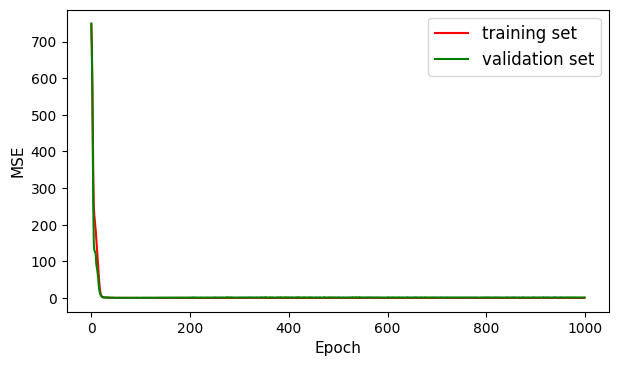

In [13]:
plt.figure(figsize=(7, 4), dpi=100)

plt.plot(model2_train.history['loss'], color='r', )
plt.plot(model2_train.history['val_loss'], color='g')

plt.ylabel('MSE', fontsize=11)
plt.xlabel('Epoch', fontsize=11)
plt.legend(['training set', 'validation set'], loc='upper right', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# plt.title('FFNN+MC-DO', fontsize=8)

plt.savefig('loss_dropoutJLA2.png')

In [14]:
file3 = 'fake_binned_JLA2TEST3new.dat'
data3 = np.loadtxt(file3, skiprows=3)

z_test = data3[:,0]
x_test = np.log(z_test)
# x_test = zz
# dl = data.values[:,1:][shuffle]
z_test

array([0.00894169, 0.01070325, 0.01277511, 0.01521195, 0.01807804,
       0.02144902, 0.02541381, 0.03007702, 0.03556168, 0.0420125 ,
       0.04959966, 0.05852335, 0.06901899, 0.0813635 , 0.09588256,
       0.11295924, 0.13304406, 0.15666695, 0.18445113, 0.21712966,
       0.25556469, 0.30077026, 0.35393906, 0.41647383, 0.49002445,
       0.57653142, 0.67827708, 0.79794581, 0.93869486, 1.10423763,
       1.29894169])

In [15]:
test_batch_size = 31
# x_test = np.random.uniform(np.min(z), np.max(z), test_batch_size)
# x_test = np.linspace(np.min(z), np.max(z), test_batch_size)

mc_dropout_num = 100# Run Dropout 100 times
predictions = np.zeros((mc_dropout_num, test_batch_size, 2))

for i in range(mc_dropout_num):
    predictions[i] = neural_model2.predict(x_test)
    

prediction_mc_dropout = np.mean(predictions, axis=0, dtype=np.float64)
std_mc_dropout = np.std(predictions, axis=0, dtype=np.float64)

# get mean results and its varience
predictions_dl = prediction_mc_dropout[:,0]
# pred_err = np.exp(pred_random[:,1].reshape(-1,1))
predictions_err = np.exp(prediction_mc_dropout[:,1].reshape(-1,1))
# pred_err = np.exp(pred_random[:,1].reshape(-1,1))


sigma = np.sqrt(std_mc_dropout[:, 0]**2 + std_mc_dropout[:, 1]**2+ prediction_mc_dropout[:,1]**2)

np.shape(predictions), np.shape(predictions_dl), np.shape(predictions_err), np.shape(prediction_mc_dropout)


((100, 31, 2), (31,), (31, 1), (31, 2))

In [16]:
np.shape(prediction_mc_dropout), np.shape(predictions_dl), np.shape(predictions_err)
# predictions_err

((31, 2), (31,), (31, 1))

In [17]:
Om = 0.27
# variance network
w0 = -1

# def RHSquared_a_lcdm(a):
# #         return Ezlcdm(a)**2
#     return Om*(1/a)**3 + 1 - Om

def RHSquared_a_owacdm(a, w0, wa):
#         return Ezlcdm(a)**2
    rhow = a**(-3*(1.0+w0+wa))*np.exp(-3*wa*(1-a))
    return (Om/a**3+(1.0-Om)*rhow)

def DistIntegrand_a(a, w0, wa):
#         if model == 'lcdm':
#             return 1./np.sqrt(RHSquared_a_lcdm(a))/a**2
#         elif model == 'owacdm':
        return 1./np.sqrt(RHSquared_a_owacdm(a, w0, wa))/a**2
    
def Da_z(z, w0, wa):
        # r=intg.quad(self.Hinv_z,0,z)
        # this version seems to be faster
        r = intg.quad(DistIntegrand_a, 1./(1+z), 1, args=(w0, wa))

        r = r[0]
      
        return r
    
def distance_modulus(z, w0=-1, wa=0.0):
        # I think this should also work with varyPrefactor as long as BAO is there too
        # assert(not self.varyPrefactor)

        # note that our Da_z is comoving, so we're only
        # multilpyting with a single (1+z) factor
#         return 5*np.log10(Da_z(z, model, w0, wa)*(1+z)) 
    return 5*np.log10(Da_z(z, w0, wa)*(1+z))+43



In [18]:
zmodel = np.linspace(0.01, 1.5, 100)
flcdm = []
fowacdm1 = []
# fowacdm2 = []
# fowacdm3 = []

# flcdm = []
for zzz in zmodel:
    flcdm.append(distance_modulus(zzz, w0=-1, wa=0))
#     fowacdm1.append(distance_modulus(zzz, w0=-1.3, wa=1.2))
    fowacdm1.append(distance_modulus(zzz, w0=-10, wa=-100))
#     fowacdm2.append(distance_modulus(zz, model='owacdm', w0=-1, wa=-0.5))
#     fowacdm3.append(distance_modulus(zz, model='owacdm', w0=-1, wa=0.0))
    
flcdm = np.array(flcdm)
fowacdm1 = np.array(fowacdm1)
# fowacdm2 = np.array(fowacdm2)
# fowacdm3 = np.array(fowacdm3)

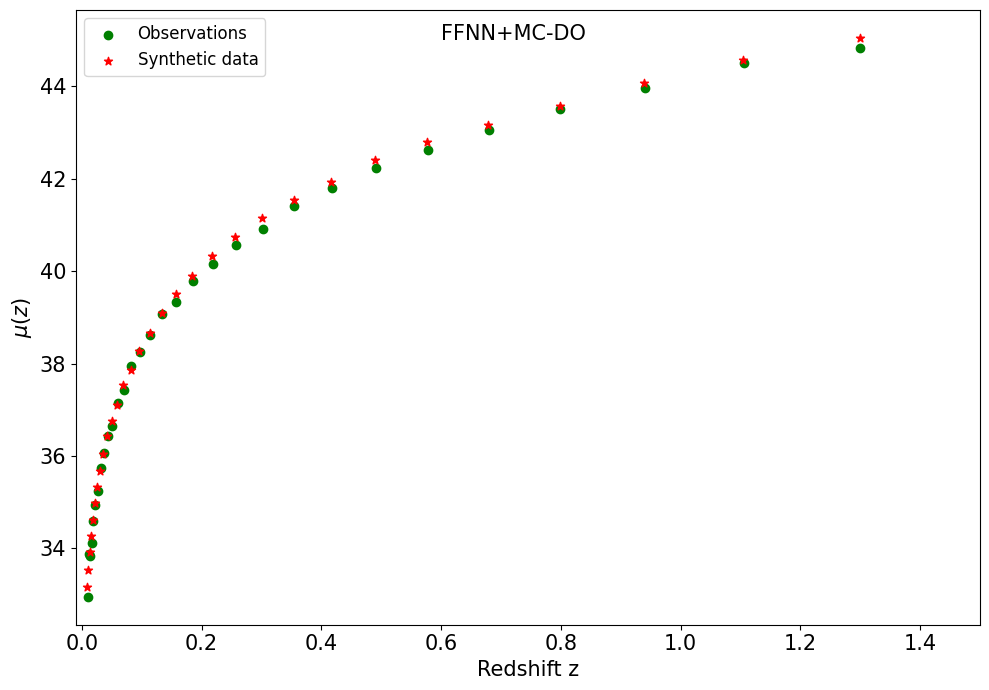

In [19]:
# Plotting
# dlfake = scalerdl.inverse_transform(prediction_mc_dropout[:,0].reshape(-1,1))
# dlfake = prediction_mc_dropout[:,0]
plt.figure(figsize=(10, 7), dpi=100)
x_test = np.exp(x_test)
# print(np.shape(dlfake))

# fakeerrors = np.sqrt(np.abs(np.diagonal(decoded_fake.reshape(31,31))))
# sigma = np.sqrt(std_mc_dropout.reshape(31,))

plt.scatter(z, dl, c='g', label='Observations')
# plt.errorbar(z, dl, errors, fmt='g.', markersize=10, label='Observations')
plt.scatter(x_test, predictions_dl, marker='*', c='r', label='Synthetic data')

# plt.errorbar(x_test, dlfake, yerr=sigma
#              , markersize=10, fmt='.', 
#              ecolor='blue', capthick=2, elinewidth=0.9, alpha=0.8, c='r',
#              label='Synthetic data')

# plt.scatter(scalerz.inverse_transform(zz), yy, color='k', label='Original cosmic chronometers')
# plt.plot(zmodel, flcdm, label='$\Lambda CDM$', c='b')
# plt.plot(zmodel, fowacdm1, label='CPL $w_0 = -1.3, w_a=1.2$', c='m')
# plt.plot(zmodel, fowacdm2, label='$\omega_0\omega_aCDM \;\; \omega_a=-0.5$', c='y')
# plt.plot(zmodel, Hlcdm(zmodel), label='$\Lambda CDM$ $H_0 = 73.24$', c='k')
# plt.plot(zmodel, Hlcdm(zmodel, H0=67.4), label='$\Lambda CDM$ $H_0 = 67.4$', c='b')
plt.xlim(-0.01, np.max(z)+0.2)
plt.xlabel("Redshift z", fontsize=15)
plt.ylabel("$\mu(z)$", fontsize=15)
# plt.xlim(0, np.max(z))
plt.xticks(fontsize=15)
plt.text(0.6, 45, 'FFNN+MC-DO', fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()

plt.legend(loc='upper left', fontsize=12)
# plt.show()
plt.savefig('DL_dropoutb2.png')

In [20]:
index = np.argsort(z_test)
dlfake = predictions_dl
fake_data2 = np.stack((z_test[index], dlfake.reshape(31,)[index]), axis=1)


np.savetxt("fake_binned_JLADO.dat",  fake_data2, delimiter= " ", header="#fake data\n# z\n# mu", fmt='%1.9f')
# np.savetxt("errors_JLA_DO.dat", predictions_err, delimiter= " ", header="#fake statistical errors", fmt='%1.9f')

In [21]:
tf.keras.models.save_model(neural_model2, '..models/FFNN_JLA_DO.h5' )